# Linear Regression with SGD
> Linear Regression from scratch with SGD

- toc: true 
- badges: true
- comments: true
- categories: [Machine Learning]

In case we cannot solve models analytically, we still train models effectively in practice. The algorithm optimize parameters in the direction that incrementally lowvers the loss function is called *gradient descent*.

We will often settle for sampling a random minibatch of examples every time we need to compute the update, a variant called *minibatch stochastic gradient descent*.

In each interation, we first randomly sample a minibatch $\beta$ consisting of a fixed number of training examples. We then compute the gradient of the average loss on the minibatch with regard to the model parameters. Finally, we multiply the gradient by a positive value $\eta$ and subtract the result from the current parameters values.

$$ \mathbf{w} \leftarrow \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}\mathbf{w}$$



# Generating the Dataset

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
X, y = synthetic_data(true_w, true_b, 1000)

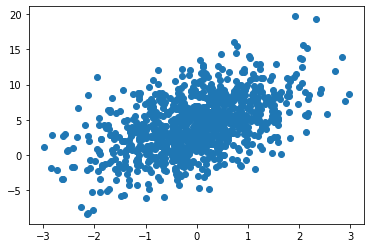

In [3]:
plt.scatter(x=X[:,0].numpy(),y=y[:,0].numpy())

# Reading the Dataset

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

# Initalizing the Parameters

In [5]:
w = tf.Variable(tf.random.normal(shape=(3,1), mean=0, stddev=0.01),trainable=True)

# Defining the Model

In [6]:
def linreg(X,w):
    return tf.matmul(X,w)

# Defining the Loss Function

In [7]:
def squared_loss(y_hat,y):
    return (y_hat-y)**2/2

# Defining the Optimizatioin Algorithm

In [8]:
def sgd(w, grad, lr, batch_sizze):
    w.assign_sub(lr*grad/batch_sizze)

# Training

In [9]:
X=tf.concat([X,tf.ones(y.shape)],1)

In [15]:
lr = 0.03
num_epochs = 100
net = linreg
loss = squared_loss
batch_size = 500
for epoch in range(num_epochs):
    for X_, y_ in data_iter(batch_size, X, y):
        with tf.GradientTape() as g:
            l = loss(net(X_, w), y_)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw = g.gradient(l, w)
        # Update parameters using their gradient
        sgd(w, dw, lr, batch_size)
    train_l = loss(net(X, w), y)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.240866
epoch 2, loss 0.212633
epoch 3, loss 0.187720
epoch 4, loss 0.165735
epoch 5, loss 0.146335
epoch 6, loss 0.129210
epoch 7, loss 0.114100
epoch 8, loss 0.100762
epoch 9, loss 0.088989
epoch 10, loss 0.078597
epoch 11, loss 0.069422
epoch 12, loss 0.061322
epoch 13, loss 0.054172
epoch 14, loss 0.047859
epoch 15, loss 0.042285
epoch 16, loss 0.037362
epoch 17, loss 0.033016
epoch 18, loss 0.029177
epoch 19, loss 0.025787
epoch 20, loss 0.022793
epoch 21, loss 0.020148
epoch 22, loss 0.017812
epoch 23, loss 0.015749
epoch 24, loss 0.013926
epoch 25, loss 0.012315
epoch 26, loss 0.010892
epoch 27, loss 0.009635
epoch 28, loss 0.008524
epoch 29, loss 0.007542
epoch 30, loss 0.006674
epoch 31, loss 0.005908
epoch 32, loss 0.005230
epoch 33, loss 0.004631
epoch 34, loss 0.004102
epoch 35, loss 0.003634
epoch 36, loss 0.003220
epoch 37, loss 0.002854
epoch 38, loss 0.002531
epoch 39, loss 0.002245
epoch 40, loss 0.001992
epoch 41, loss 0.001768
epoch 42, loss 0.001571
e

In [16]:
w

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9983404],
       [-3.3994982],
       [ 4.1987143]], dtype=float32)>